In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['seg_test', 'seg_pred', 'seg_train']


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,pooling,BatchNormalization,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
os.listdir("../input/seg_train/seg_train")

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [4]:
mountain= os.listdir("../input/seg_train/seg_train/mountain")
street= os.listdir("../input/seg_train/seg_train/street")
glacier= os.listdir("../input/seg_train/seg_train/glacier")
buildings= os.listdir("../input/seg_train/seg_train/buildings")
sea= os.listdir("../input/seg_train/seg_train/sea")
forest= os.listdir("../input/seg_train/seg_train/forest")

In [5]:
#Declaring empty list for the images and its labels respectively
data =[]
labels=[]
#Running the for loop for storing the image array in the data
for i in mountain:
    image=cv2.imread("../input/seg_train/seg_train/mountain/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(0)
for i in street:
    image=cv2.imread("../input/seg_train/seg_train/street/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(1)
for i in glacier:
    image=cv2.imread("../input/seg_train/seg_train/glacier/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(2)
for i in buildings:
    image=cv2.imread("../input/seg_train/seg_train/buildings/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(3)
for i in sea:
    image=cv2.imread("../input/seg_train/seg_train/sea/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(4)
for i in forest:
    image=cv2.imread("../input/seg_train/seg_train/forest/"+i)
    array_image=Image.fromarray(image,"RGB")
    resize_img=array_image.resize((150,150))
    data.append(np.array(resize_img))
    labels.append(5)

In [6]:
len(labels)
len(data)

14034

In [7]:
Data=np.array(data)
labels=np.array(labels)

In [8]:
print(Data.shape)
print(labels.shape)

(14034, 150, 150, 3)
(14034,)


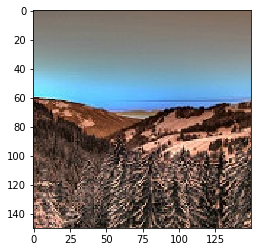

In [9]:
plt.imshow(Data[2])

In [10]:
num=np.arange(Data.shape[0])

In [11]:
random.shuffle(num)

In [12]:
len(num)

14034

In [13]:
Data=Data[num]
labels=labels[num]


In [14]:
Data=Data/255

In [15]:
labels= keras.utils.to_categorical(labels)

In [16]:
model =Sequential()
model.add(Conv2D(16,kernel_size=2,activation="relu",padding="same",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,kernel_size=2,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=2,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
#model.add(Conv2D(16,kernel_size=2,pooling="same")
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(6,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
__________

In [18]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [20]:
val=model.fit(Data,labels,epochs=6,batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
14034/14034 [==============================] - 19s 1ms/step - loss: 11.7749 - acc: 0.2611
Epoch 2/6
14034/14034 [==============================] - 17s 1ms/step - loss: 11.4347 - acc: 0.2895
Epoch 3/6
14034/14034 [==============================] - 17s 1ms/step - loss: 11.5974 - acc: 0.2797
Epoch 4/6
14034/14034 [==============================] - 17s 1ms/step - loss: 11.5612 - acc: 0.2819
Epoch 5/6
14034/14034 [==============================] - 17s 1ms/step - loss: 11.4401 - acc: 0.2897
Epoch 6/6
14034/14034 [==============================] - 17s 1ms/step - loss: 11.4655 - acc: 0.2880


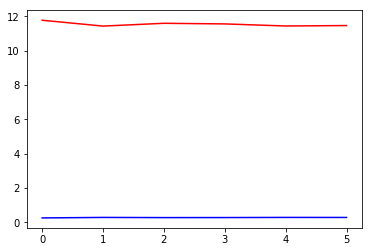

In [21]:
plt.plot(val.history["loss"],color="r")
plt.plot(val.history["acc"],color="b")